<a href="https://colab.research.google.com/github/neilgarnet/ML-Weather-Project/blob/main/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
#Displaying basic information about the dataset
df = pd.read_csv("/content/Waether dataset.csv")
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())


Saving Waether dataset.csv to Waether dataset (2).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           150 non-null    object 
 1   city           150 non-null    object 
 2   country        150 non-null    object 
 3   latitude       150 non-null    float64
 4   longitude      150 non-null    float64
 5   temperature    150 non-null    float64
 6   humidity       150 non-null    float64
 7   precipitation  150 non-null    float64
 8   AQI            150 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 10.7+ KB
None

First 5 rows of the dataset:
         date      city    country  latitude  longitude  temperature  \
0  2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1  2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2  2024-06-01     Tokyo

In [ ]:

# Removing duplicate rows if any
df = df.drop_duplicates()
print(df)

           date      city    country  latitude  longitude  temperature  \
0    2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1    2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2    2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3    2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4    2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..          ...       ...        ...       ...        ...          ...   
145  2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146  2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147  2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148  2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149  2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  
0       43.13       0.288007  152  
1       63.49       0.849684  142  
2  

In [ ]:

# Convert 'date' column to datetime format and extract additional temporal features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  
0       43.13       0.288007  152      6    1  
1       63.49       0.84968

In [ ]:
# Creating new features based on domain insights:
# - Interaction between temperature and humidity
# - Interaction between temperature and precipitation
df['temp_humidity_interaction'] = df['temperature'] * df['humidity']
df['temp_precipitation_interaction'] = df['temperature'] * df['precipitation']

In [ ]:

#Outlier Detection & Treatment using IQR
def cap_outliers(col):
    """
    Caps the outliers in a numerical column using the IQR method.
    Outliers below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR) are replaced with these threshold values.
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower_bound, upper_bound)

# Applying outlier capping on 'temperature' and 'precipitation'
df['temperature'] = cap_outliers(df['temperature'])
df['precipitation'] = cap_outliers(df['precipitation'])
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  temp_humidity_interaction  \
0       43.13       0.288007  152      6    1  

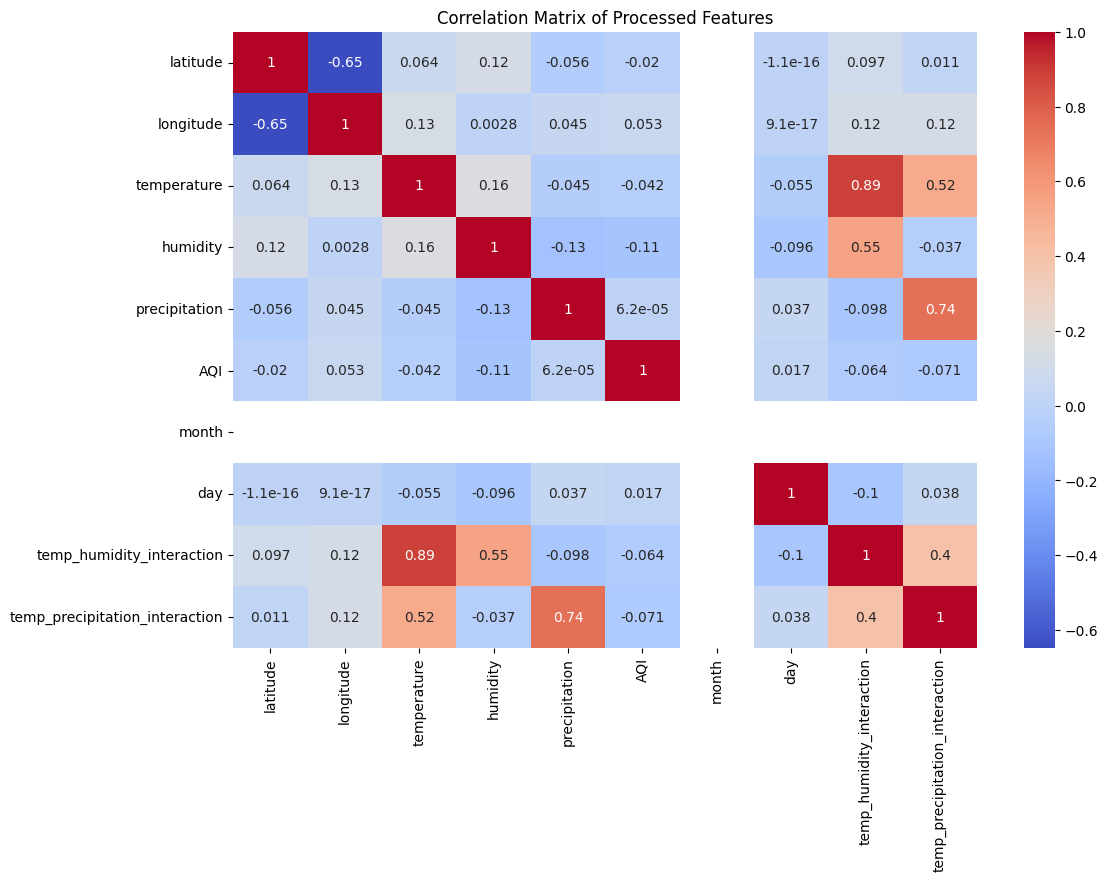

In [ ]:
# Feature Selection Insight (Correlation Matrix)
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Plot the correlation matrix to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Processed Features")
plt.show()

In [ ]:

# Final Processed Data Overview
print(df)

          date      city    country  latitude  longitude  temperature  \
0   2024-06-01  New York        USA   40.7128   -74.0060     5.261208   
1   2024-06-01    London         UK   51.5074    -0.1278    16.828661   
2   2024-06-01     Tokyo      Japan   35.6895   139.6917    19.189069   
3   2024-06-01    Sydney  Australia  -33.8688   151.2093    12.814943   
4   2024-06-01    Mumbai      India   19.0760    72.8777     9.848917   
..         ...       ...        ...       ...        ...          ...   
145 2024-06-30  New York        USA   40.7128   -74.0060    13.522181   
146 2024-06-30    London         UK   51.5074    -0.1278    10.526193   
147 2024-06-30     Tokyo      Japan   35.6895   139.6917     1.573264   
148 2024-06-30    Sydney  Australia  -33.8688   151.2093    17.722635   
149 2024-06-30    Mumbai      India   19.0760    72.8777    -0.910156   

     humidity  precipitation  AQI  month  day  temp_humidity_interaction  \
0       43.13       0.288007  152      6    1  

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/Waether dataset.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=['AQI'])  # Assuming 'AQI' is the target variable
y = df['AQI']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/Waether dataset.csv")

# ✅ Convert 'date' column to datetime and extract numeric features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(columns=['date'])  # Drop original date column

# ✅ Encode categorical columns using One-Hot Encoding
df = pd.get_dummies(df, columns=['city', 'country'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['AQI'])  # Assuming 'AQI' is the target variable
y = df['AQI']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Training Random Forest Model
# ----------------------------
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)  # ✅ Now the model should train without errors


RandomForestClassifier(max_depth=10, random_state=42)

Model Accuracy: 0.03

Classification Report:
               precision    recall  f1-score   support

          51       0.00      0.00      0.00         0
          52       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         0
          54       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         0
          58       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         2
          67       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         0
          77       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1
          94       0.00      0.00      0.00         0
          97       0.00      0.00      0.00         1
          99       0.00      0.00      0.00         0
         101       0.00      0.00      0.00         0
         102       0.00      0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

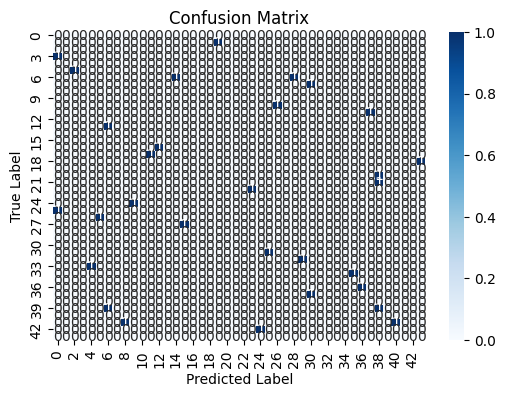

In [ ]:
# ----------------------------
# Model Evaluation
# ----------------------------

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-17-ca7a72f39b3b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


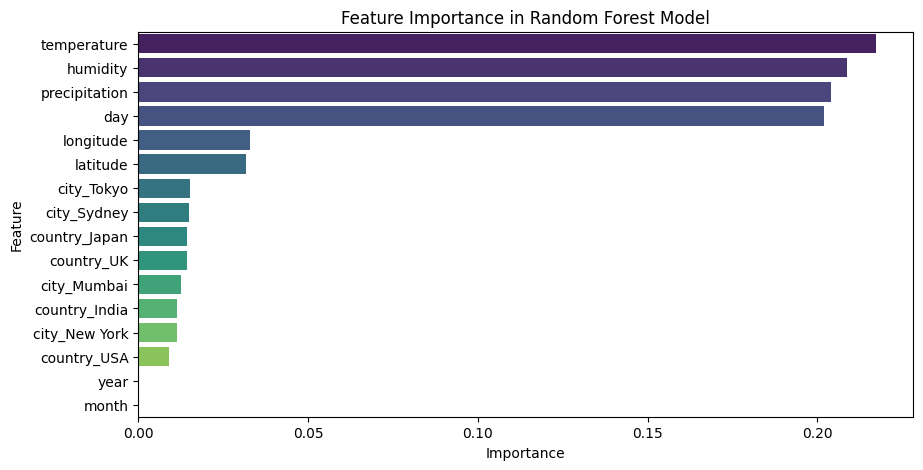

In [ ]:
# ----------------------------
# Feature Importance Analysis
# ----------------------------

# Extract feature importances from the trained model
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.show()